In [40]:
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
ddd

# Exploratory Data Analysis (EDA) 

#### Loading the dataset

In [177]:
# load all the dataset into a single dataframe df

country = ['CA','GB','US']

df = pd.DataFrame()
df1 = pd.DataFrame()

for c in country:
    df1 = pd.read_csv('../../data/raw/'+ c +'_youtube_trending_data.csv',parse_dates= ['trending_date','publishedAt'])
    df1['country']= c
    df = pd.concat([df,df1])

#change the datetime
df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

#### Wrangling the data

In [ ]:
#category ID dictionary
category_replace = {
      1:'Film & Animation',
      2:'Autos & Vehicles',
      10:'Music',
      15:'Pets & Animals',
      17:'Sports',
      19:'Travel & Events', 
      20:'Gaming',
      21:'Videoblogging',
      22: "People & Blogs",
      23: "Comedy", 
      24: "Entertainment",
      25: "News & Politics", 
      26: "Howto & Style", 
      27: "Education", 
      28: "Science & Technology",
      29: 'NaN'
    }

In [ ]:
#clean the dataset
df_clean = df.drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
df_clean = df_clean.replace({"categoryId":category_replace}).rename(columns= {'categoryId':'category'})
df_clean = df_clean.drop(df_clean[df_clean['category']=='NaN'].index).drop(df_clean[df_clean['view_count']==0].index).sort_values('trending_date')
df_clean = df_clean.reset_index().drop(columns = ['index'])


*In the dataset, a video_id has one publish date and mutiple trending dates.
I would like to keep each video to have only one record so that we can define which types of video is most popular.*

In [120]:
#drop the duplicate video and keep the video with the last trending_date
#df_lastdate = df_clean[df_clean['video_id']=='KX06ksuS6Xo']
df_lastdate = df_clean.drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')

df_lastdate

,video_id,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,country
0,uRUh9Ucr_yg,2020-08-10,BT Sport,Sports,2020-08-12,europa league|man utd copenhagen|man utd highl...,772339,10381,517,2466,GB
1,AdWLrHcnC5I,2020-08-11,BT Sport,Sports,2020-08-12,bt sport|bt sport official|bt sport football|b...,156639,2593,47,402,GB
2,WGvdHPfwD-k,2020-08-11,BT Sport,Sports,2020-08-12,bt sport|bt sport official|wolves|wolves sevil...,313473,5249,129,1114,GB
3,C_5aEQB1KUk,2020-08-09,TheWeasle,Sports,2020-08-12,ufc|derrick lewis|derrick lewis knockout|derri...,125795,2828,99,587,GB
4,RKwW1_EUVkc,2020-08-08,Tyrrell's Classic Workshop,Autos & Vehicles,2020-08-12,Iain Tyrrell|Tyrrell's Classic Workshop|Classi...,71068,6527,23,979,GB
...,...,...,...,...,...,...,...,...,...,...,...
5386,maVWvNkhgpM,2020-10-18,Tessa Brooks,People & Blogs,2020-10-23,Tessa Brooks|BrookstersMartinez|twins|Lucas an...,1785634,79751,3014,4161,GB
5387,jadyZfdxX4I,2020-10-19,Young MA,Music,2020-10-23,youngma|young m.a|Young M.A.|dripset|ooouuu|pe...,754972,52130,1308,3499,GB
5388,-CWPIgK4G-k,2020-10-20,Pamela Reif,Sports,2020-10-23,workout|training|butt|glute|booty|ass|legs|mus...,455972,16496,324,1030,GB
5389,iCJsYBtFJzs,2020-10-18,The ACE Family,People & Blogs,2020-10-23,alaia's 2nd birthday party special|the ace fam...,4642666,243463,8961,7645,GB


In [158]:
#calculate the videos' like to dislike ratio (assuming that there are likes and dislikes)
df_clean["ratio"] = df_clean.apply(lambda row: 0 if row["dislikes"]==0 else (row["likes"]/row["dislikes"]), axis=1)

In [159]:
df_clean

,video_id,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,country,ratio
0,KX06ksuS6Xo,2020-08-11,Diljit Dosanjh,Music,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,CA,47.983981
1,6IN4ZcZAUbA,2020-08-10,Vox,News & Politics,2020-08-12,Vox.com|vox|explain|explainer|colombia|climate...,1127988,41715,1359,4909,GB,30.695364
2,tbsu-AWH-C0,2020-08-10,Stephen Sharer,Music,2020-08-12,Stephen Sharer|Share The Love|Steven Share|Car...,823262,24171,3573,5204,GB,6.764903
3,yqpnJFga4cA,2020-08-09,Footasylum,Entertainment,2020-08-12,chunkz|filly|chunkz and filly|spuddz|footasylu...,351585,23122,151,978,GB,153.125828
4,Xrm6TKrPkMo,2020-08-09,Brandonio,Entertainment,2020-08-12,brandonio|brandonio sister|user friendly|brand...,252844,17555,256,1709,GB,68.574219
...,...,...,...,...,...,...,...,...,...,...,...,...
43665,maVWvNkhgpM,2020-10-18,Tessa Brooks,People & Blogs,2020-10-23,Tessa Brooks|BrookstersMartinez|twins|Lucas an...,1785634,79751,3014,4161,GB,26.460186
43666,jadyZfdxX4I,2020-10-19,Young MA,Music,2020-10-23,youngma|young m.a|Young M.A.|dripset|ooouuu|pe...,754972,52130,1308,3499,GB,39.854740
43667,-CWPIgK4G-k,2020-10-20,Pamela Reif,Sports,2020-10-23,workout|training|butt|glute|booty|ass|legs|mus...,455972,16496,324,1030,GB,50.913580
43668,iCJsYBtFJzs,2020-10-18,The ACE Family,People & Blogs,2020-10-23,alaia's 2nd birthday party special|the ace fam...,4642666,243463,8961,7645,GB,27.169178


In [121]:
#tags analysis
#turn tags into actual list
df_clean["tags"] = df_clean.apply(lambda row: row["tags"].split("|"), axis=1)

### Pandas_profiling

In [123]:
profiling = pandas_profiling.ProfileReport(df_clean)

### View data

In [124]:
df_lastdate.shape

(5391, 11)

In [125]:
df_lastdate.sort_values('view_count')

,video_id,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,country
3112,drTCzZCkqgw,2020-09-21,10 Downing Street,News & Politics,2020-09-25,[None],21963,172,110,198,GB
4181,PD2uwT-cHIA,2020-10-06,Most Haunted Official,Entertainment,2020-10-11,most haunted|yvette fielding|karl beattie|para...,22152,2125,21,411,GB
156,GVaPrbcTRgM,2020-08-10,Met Office - Weather,News & Politics,2020-08-14,forecast|6179891359001,22902,346,19,114,GB
2410,Xdjej6zygaE,2020-09-12,Jay's Virtual Pub Quiz,Entertainment,2020-09-16,[None],28313,117,8,4,GB
2929,k0nhAuqAqv8,2020-09-19,Jay's Virtual Pub Quiz,Entertainment,2020-09-23,[None],29881,148,12,7,GB
...,...,...,...,...,...,...,...,...,...,...,...
4543,YTZ-GZPTND8,2020-10-09,The Pixel Kingdom,Gaming,2020-10-16,among us|100 player|99 player|hack|cheat|multi...,73728043,2337792,55198,69154,US
331,hsm4poTWjMs,2020-08-07,Cardi B,Music,2020-08-16,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,98443029,3207740,467721,310631,CA
4083,dyRsYk0LyA8,2020-10-02,BLACKPINK,Music,2020-10-09,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,140685439,9217884,127311,1507562,CA
1667,vRXZj0DzXIA,2020-08-28,BLACKPINK,Music,2020-09-05,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795687,879357,2736022,CA


In [126]:
df_lastdate.describe()

,view_count,likes,dislikes,comment_count
count,5.391000e+03,5.391000e+03,5391.000000,5.391000e+03
mean,1.978310e+06,1.067106e+05,2781.552402,1.123576e+04
std,6.196106e+06,3.977063e+05,18778.375392,1.102435e+05
min,2.196300e+04,0.000000e+00,0.000000,0.000000e+00
25%,3.118330e+05,9.105500e+03,211.000000,9.940000e+02
50%,7.038190e+05,2.707400e+04,540.000000,2.450000e+03
75%,1.671428e+06,8.161200e+04,1542.500000,6.179000e+03
max,2.326492e+08,1.573557e+07,879357.000000,6.064909e+06


In [127]:
df_lastdate.describe(exclude=[np.number])

,video_id,publishedAt,channelTitle,category,trending_date,tags,country
count,5391,5391,5391,5391,5391,5391,5391
unique,5391,83,2441,14,73,4455,3
top,GNi6gLB-SqQ,2020-09-14,Sky Sports Football,Sports,2020-10-23,[None],US
freq,1,96,87,1189,341,542,2064


### Data Analysis and Visualizations

In [95]:
sns.set_theme(style="white",
              font_scale=1,
             )

##### Which category have more video pulibshed?

In [82]:
#Group category
category_group = (
    df_lastdate.groupby(by='category')
    .size()
    .sort_values(ascending = False)
    .reset_index()
    .rename(columns= {0:'#_count'})
)
category_group

,category,#_count
0,Sports,1189
1,Entertainment,1095
2,Music,966
3,People & Blogs,390
4,Gaming,340
5,Comedy,323
6,Science & Technology,239
7,News & Politics,237
8,Howto & Style,207
9,Film & Animation,134


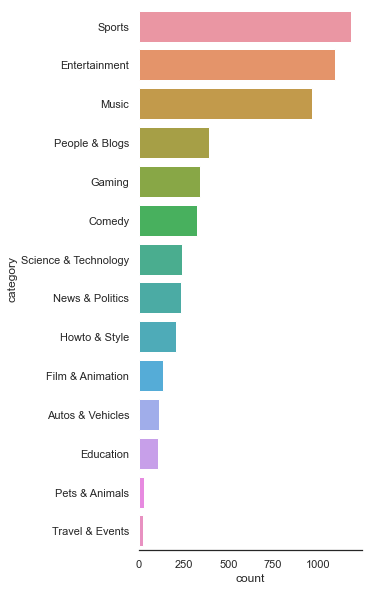

In [137]:
sns.countplot(data = df_lastdate, y='category',order=category_group['category'])
plt.gcf().set_size_inches(4,10)
sns.despine(right = True, left = True)

*Statistics show that the 'sport','entertainment' and 'music' are the three commons types of videos that being published on Youtube.*

In [129]:
df_assign = df_lastdate.assign(log_viewcount= np.log(df_lastdate['view_count']))

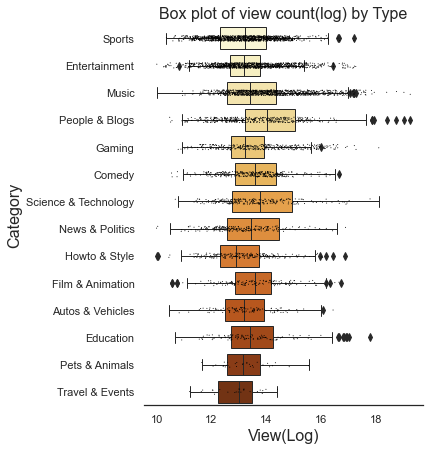

In [150]:
sns.boxplot(data = df_assign, x='log_viewcount', y='category', 
            palette = 'YlOrBr', linewidth =1)
sns.stripplot(data = df_assign, x='log_viewcount', y='category',
              color ='black',size = 1, order = category_group['category'])
sns.despine(right = True, left = True)
plt.gcf().set_size_inches(5,7)
plt.title('Box plot of view count(log) by Type', fontsize=16)
plt.xlabel('View(Log)', 
          fontsize = 16)
plt.ylabel('Category',fontsize = 16)
plt.show()

The boxplot shows that people in Great Britian, US and Canada are interested in watching 'People & Blogs' and 'Science & Technology'.

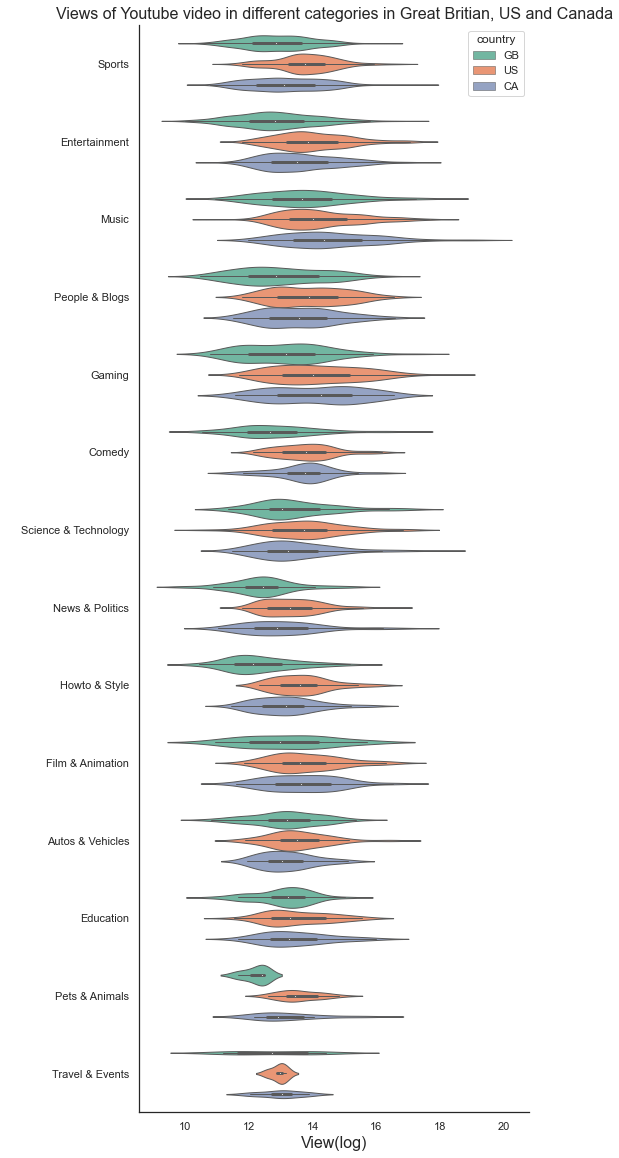

In [155]:
sns.violinplot(data = df_assign, x='log_viewcount', y='category',
              order = category_group['category'], hue = 'country',
              palette = 'Set2',
              linewidth = 1)
sns.despine(right = True)
plt.gcf().set_size_inches(7,20)
plt.title('Views of Youtube video in different categories in Great Britian, US and Canada', fontsize=16)
plt.xlabel('View(log)', 
          fontsize = 16)
plt.ylabel(' ')
plt.show()